In [1]:
import math
import cmath
import random
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 4.1

In [52]:
# assign example probabilities 
g = .3
t = .2

In [53]:
# TGT win probs
www = t*g*t
wwl = t*g*(1-t)
lww = (1-t)*g*t

In [54]:
www+wwl == g*t

True

In [55]:
# prob of being accepted by playing T, G, T
pTGT = g*t + lww

In [56]:
# GTG
www = g*t*g
wwl = g*t*(1-g)
lww = (1-g)*t*g

In [57]:
www+wwl == g*t

True

In [58]:
# prob of being accepted by playing G, T, G
pGTG = g*t + lww

In [59]:
pGTG

0.102

In [60]:
pTGT

0.108

In [61]:
pTGT>pGTG

True

# 4.2

In [114]:
def chain(inp, boxes, prob):
    out = inp
    for box in range(0, boxes):
        r = random.random()
        if r > (1-prob):
            out = not out
    return out

In [115]:
inp = True
outs = 0
for i in range(0, 100):
    if chain(True, 5, .3):
        outs += 1

In [116]:
outs

54

In [1]:
# TODO: finish 4.2

# 4.4

In [71]:
def countEvens(p, n, sims=1000):
    flips = []
    evens = []
    for s in range(0, sims):
        for i in range(0, n):
            flips.append(random.choices([0,1], [1-p, p])[0])
        if flips.count(1)%2 == 0:
            evens.append(1)
        else:
            evens.append(0)
    return evens.count(1)/sims

In [138]:
countEvens(.9, 5)

0.507

ANSWER = 50%

In [1]:
# TODO: ^ this is incorrect, right answer is .5 + .5(1-2p)^n, which is basically 0.5 when n is big
# need to understand how to incorporate n into our result - should be clearer when n is small e.g. ~5

In [117]:
def countFlips(p, sims=1000):
    count = []
    for s in range(0, sims):
        flips = []
        while True:
            flips.append(random.choices([0,1], [1-p, p])[0])
            # if flips.count(1)%2 == 0:
            if flips.count(1) == 2:
                count.append(len(flips))
                break
    return statistics.mean(count)

In [131]:
countFlips(.5)

4.017

In [139]:
2/.25

8.0

ANSWER = 2/p

# 4.5

In [153]:
a_win_prob = 2/3
game_counts = []
winner = []
outcomes = {2:[], 3:[], 4:[], 5:[], 6:[]}
for i in range(0, 100000):
    a_wins = 0
    b_wins = 0
    while True:
        # 0=a, 1=b
        game = random.choices([0, 1], [a_win_prob, 1-a_win_prob])[0]
        # print("round winner: ", game)
        if game == 0:
            a_wins +=1
        else:
            b_wins += 1
        if abs(a_wins-b_wins) == 2 or a_wins+b_wins == 6:
            break
    game_count = a_wins+b_wins
    # print("game count: ", game_count)
    if a_wins>b_wins:
        outcomes[game_count].append('a')
        # winner.append('a')
    elif b_wins>a_wins:
        # winner.append('b')
        outcomes[game_count].append('b')
    else:
        # winner.append('t')
        outcomes[game_count].append('t')
    game_counts.append((game_count))

In [154]:
total = len(outcomes[2])
outcomes[2].count('a')/total, outcomes[2].count('b')/total

(0.8003568274793202, 0.19964317252067978)

In [155]:
total = len(outcomes[4])
outcomes[4].count('a')/total, outcomes[4].count('b')/total

(0.7987760395558078, 0.20122396044419227)

In [156]:
total = len(outcomes[6])
outcomes[6].count('a')/total, outcomes[6].count('b')/total, outcomes[6].count('t')/total

(0.4435146443514644, 0.11508796693048344, 0.4413973887180521)

In [157]:
statistics.mean(game_counts)

3.28696

In [158]:
266/81

3.2839506172839505

E(e) = ~3.287 = 266/81

# 4.6

In [226]:
phone_num = "123-456-7890"
known = "123-456-789"

In [227]:
# 2 guesses
sims = 100000
correct = 0
guesses = 2
for i in range(0, sims):
    options = list(range(0,10))
    for i in range(0, guesses):
        g = random.choices(options)[0]
        options.remove(g)
        if g == 0:
            correct += 1
            break

In [228]:
correct/sims

0.20075

In [229]:
# 2 guesses
sims = 100000
correct = 0
guesses = 3
for i in range(0, sims):
    options = list(range(0,10))
    for i in range(0, guesses):
        g = random.choices(options)[0]
        options.remove(g)
        if g == 0:
            correct += 1
            break

In [230]:
correct/sims

0.30128

2 attempts = 1/5  
3 attempts = 3/10

# 4.7

In [151]:
tot = 121
b = 66  # 1
w = tot-b  # 0
print("Black: " + str(b) + "\nWhite: " + str(w))

Black: 66
White: 55


In [156]:
occ = 0
sims = 100000
for i in range(0, sims):
    x = random.choices([0, 1], [(w/tot), b/tot])[0]
    y = random.choices([0, 1], [(w/tot), b/tot])[0]
    if x==y:
        occ += 1

In [157]:
occ/sims

0.50119

In [2]:
# TODO: add more conclusive way to determine answer of 65 and 55.
# We are able to ballpark with above example, but not get a definitive answer.
# Figure out how to prove this

# 4.8

In [52]:
# 0 => black
# 1 => red
sims = 1000

In [53]:
profits = []
for i in range(0, sims):
    me = 0
    you = 0
    deck = [0]*26 + [1]*26
    for i in range(0, 26):
        x = random.choices(deck)[0]
        deck.remove(x)
        y = random.choices(deck)[0]
        deck.remove(y)
        if x==y:
            if x == 0:
                me += 2
            else:
                you += 2
    if you >= me:
        profits.append(-1)
    elif me > you:
        profits.append((me-you)*3)

-1
-1.0


<AxesSubplot:ylabel='Count'>

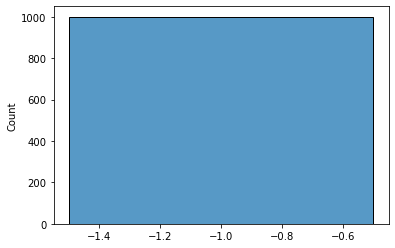

In [56]:
print(statistics.mean(profits))
print(statistics.median(profits))
sns.histplot(profits)

# 4.9

In [33]:
def getOnLights(d):
    lights = []
    for light, o in d.items():
        if o == 1:
            lights.append(light)
    return lights

def alternate(lights, v):
    for light, val in lights.items():
        if light%v == 0:
            # Flip light on/off
            lights[light] = 1 - lights[light]
    return lights

In [36]:
# Step 1
lights = list(range(1, 101))
lights = dict.fromkeys(lights, 1)

# Step 2
lights = alternate(lights, 2)

In [39]:
# Step 3
lights = alternate(lights, 3)

# etc

In [57]:
steps = list(range(2, 101))
# Step 1
lights = list(range(1, 101))
lights = dict.fromkeys(lights, 1)

# Steps 2 to 100
for i in steps:
    lights = alternate(lights, i)

In [58]:
getOnLights(lights)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [59]:
len(getOnLights(lights))/100

0.1

# 4.10

In [26]:
sims = 1000
count = 0
for i in range(0, sims):
    bag = ['1', '2', '3', '4']
    draw = random.sample(bag, 3)
    draw_val = ''.join(draw)
    if int(draw_val)%3 == 0:
        count += 1

In [27]:
count/sims

0.496

In [28]:
# other solution
sims = 1000
count = 0
for i in range(0, sims):
    bag = [1, 2, 3, 4]
    draw = random.sample(bag, 3)
    draw_sum = sum(draw)
    if int(draw_sum)%3 == 0:
        count += 1

In [29]:
count/sims

0.513

# 4.12

In [3]:
def getF(c):
    return (c * 9/5) + 32

In [50]:
sims = 100000
cnt = 0
for i in range(0, sims):
    temp = np.random.uniform(15, 25)
    f_round = round(getF(temp))
    c_round = round(getF(round(temp)))
    if c_round != f_round:
        cnt += 1

In [51]:
cnt/sims

0.44422

In [1]:
4/9

0.4444444444444444

# 4.13

In [87]:
def quadForm(a, b, c):
    d = (b**2) - (4*a*c)
    x1 = (-b-cmath.sqrt(d))/(2*a)
    x2 = (-b+cmath.sqrt(d))/(2*a)
    return x1, x2

In [88]:
sims = 100000
cnt = 0
for i in range(0, sims):
    b = random.uniform(-5, 5)
    c = random.uniform(-5, 5)
    x1, x2 = quadForm(1, b, c)
    positive = x1.imag == 0 and x1.real > 0 and x2.imag == 0 and x2.real > 0
    if x1 != x2 and positive:
        cnt += 1

In [89]:
1- cnt/sims

0.89911

# 4.14

In [145]:
n = 18
sims = 10000
p2 = 0
for r in range(0, sims):
    f = int(random.uniform(1, n+1))
    i = 0
    # print("Start int: " + str(f))
    while (f > 0):
        i += 1
        if f % 2 == 0:
            # either -1 or /2
            if f == 4:
                f = f / 2
            elif f == 6:
                f = f - 1
            else: # default
                f = f-1
        else:
            # either -1 or -1 AND /2
            if f == 1 or f == 3 or f == 7 or f == 9:
                f = f - 1
            elif f == 5:
                f = (f-1)/2
            else: # default
                f = f-1
#         print("Update int: " + str(f))
#     print(i)
    if i % 2 == 0:
        p2 += 1
#         print("Winner: PLAYER 2")
    else:
        pass
#         print("Winner: PLAYER 1")

In [146]:
p2/sims

0.4497

In [147]:
7/18

0.3888888888888889

Player 2 wins in if first int == 2, 6, 8, or 10

In [148]:
# TODO: finish this one, we are stuck in getting correct solution

# 4.15

In [43]:
sims = 1000
same_cnt = 0
ratio = 1.333
g_cnt = 10
# 0 = girl, 1 = boy
for i in range(0, sims):
    students = [0]*g_cnt + [1]*int(g_cnt*ratio)
    select = random.sample(students, 2)
    if select.count(1) == 2 or select.count(0) == 2:
        same_cnt += 1

In [44]:
same_cnt/sims

0.501

In [65]:
sims = 1000
same_cnt = 0
ratio = 1.333
g_cnt = 19
# 0 = girl, 1 = boy
for i in range(0, sims):
    students = [0]*g_cnt + [1]*int(g_cnt*ratio)
    select = random.sample(students, 2)
    if select.count(1) == 2 or select.count(0) == 2:
        same_cnt += 1

In [66]:
same_cnt/sims

0.501

In [67]:
# TODO: clean up use of int(), connect 1.333 to triangular numbers

# 4.17

In [41]:
def getAProb(p, q, r, sims=10000):
    a_series = 0
    for i in range(0, sims):
        a_wins = 0
        b_wins = 0
        ties = 0
        while True:
            outcome = random.choices([0, 1, 2], [p, q, r])[0]  # 0=a, 1=b, 2=t
            if outcome == 0:
                a_wins += 1
            elif outcome == 1:
                b_wins += 1
            else:
                ties += 1
            if abs(a_wins - b_wins) == 2:
                break
        if a_wins > b_wins:
            a_series += 1
    return a_series/sims

In [64]:
p = .6
q = .4
r = 1 - p - q
getAProb(p, q, r)

0.6917

In [71]:
p = .4
q = .6
r = 1 - p - q
getAProb(p, q, r)

0.3086

In [75]:
p = .5
q = .5
r = 1 - p - q
getAProb(p, q, r)

0.5082

In [78]:
p = .7
q = .3
r = 1 - p - q
getAProb(p, q, r)

0.8443

In [85]:
p_choice = list(range(0, 10))

In [93]:
probs = []
for p in p_choice:
    p_p = p/10
    probs.append(getAProb(p_p, 1-p_p, 0))

In [94]:
probs

[0.0, 0.0116, 0.0566, 0.1541, 0.3056, 0.5012, 0.6876, 0.8427, 0.9425, 0.9867]

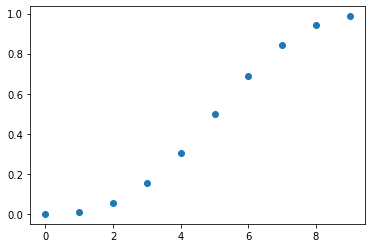

In [96]:
plt.scatter(p_choice, probs)

In [97]:
 # TODO: connect graph to acutal solution of: p^2/(p^2 + q^2)

In [101]:
.7**2/(.7**2 + .3**2)

0.8448275862068965

# 4.18

In [5]:
c = random.choices([1, 2, 3, 4, 5])[0]

In [7]:
# optimal strategy = leaving a multiple of 6
# Work backwards to get this

In [35]:
boy_wins = 0
sims = 10000
for i in range(0, sims):
    c = random.choices([1, 2, 3, 4, 5])[0]
    if c != 2:
        continue
    else:
        c2 = random.choices([1, 2, 3, 4, 5])[0]
        # we have 1/5 chance to get multiple of 6 after computer's choice
        # just assume we need 1
        if c2 != 1:
            continue
    boy_wins += 1

In [36]:
boy_wins / sims

0.0396

In [37]:
1/25

0.04

# 4.19

In [7]:
steps = 10000
cnt = 0
for i in range(0, steps):
    val = str(2**i)
    if int(val[0]) == 1:
        cnt += 1

In [8]:
cnt/steps

0.301

In [10]:
math.log(2, 10)

0.30102999566398114

# 4.20

In [8]:
def power2(r, N, steps=10000):
    cnt = 0
    for i in range(0, steps):
        val = str(2**i)
        if int(val[:r]) == N:
            cnt += 1
    return cnt/steps

In [10]:
# let r = 2
# let N = 12
power2(2, 12)

0.0348

In [11]:
power2(2, 13)

0.0322

In [12]:
power2(2, 14)

0.0299

In [13]:
power2(2, 19)

0.0222

In [14]:
power2(2, 11)

0.0377

In [15]:
power2(2, 15)

0.028

In [16]:
power2(2, 92)

0.0048

In [17]:
power2(4, 6437)

0.0001

In [21]:
math.log(1+(1/6437))

0.0001553398061376706

In [22]:
# TODO: understand and derive solution log(1 + 1/N)

# 4.21

In [2]:
# probability of one odd number i.e. not divisible by 2
1 - (1/2)**4

0.9375

In [3]:
# probability of one number not divisible by 3
1 - (1/3)**4

0.9876543209876544

In [4]:
# 1 - (1/p)**4
# Solution = 1 - PRODUCT(1 - (1/p)^4), for all primes

In [5]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
prob = None 
for p in primes:
    step = 1 - (1/p)**4
    if prob is None:
        prob = step
    else:
        prob = prob*step

In [7]:
1-prob

0.07606153016571027

# 4.22

In [28]:
cnt = 0
steps = 100000
for i in range(1, steps):
    cube = i**3
    if str(cube)[-2:] == '11':
        cnt += 1

In [29]:
cnt / steps

0.01

In [30]:
1/100

0.01

In [32]:
5**3

125

In [33]:
cnt = 0
steps = 10000
for i in range(1, steps):
    cube = i**3
    if str(cube)[-2:] == '11':
        print(i)
        break
        cnt += 1

71


In [37]:
(71**3 - 11) % 100

0

# 4.24

In [25]:
# only guess if you see two of one color, guess the other color
sims = 1000
wins = 0
for i in range(0, sims):
    hats = random.choices(['r', 'b'], k=3)
    # a sees [1], [2]
    if hats[1] == hats[2]:
        if hats[1] == 'b':
            if hats[0] != 'r':
                continue
        elif hats[0] != 'b':
            continue
    # b sees [0], [2]
    if hats[0] == hats[2]:
        if hats[0] == 'b':
            if hats[1] != 'r':
                continue
        elif hats[1] != 'b':
            continue
    # c sees [0], [1]
    if hats[0] == hats[1]:
        if hats[1] == 'b':
            if hats[2] != 'r':
                continue
        elif hats[2] != 'b':
            continue
    wins += 1

In [26]:
wins / sims

0.754

In [27]:
# lose when all red or all blue
# wins 6/8 = 3/4 = 0.75

# 4.25

In [26]:
sims = 100000
condition_cnt = 0
two_cnt = 0
for i in range(0, sims):
    r1 = random.randint(1, 6)
    r2 = random.randint(1, 6)
    r3 = random.randint(1, 6)
    if (r1+r2) == r3:
        condition_cnt += 1
        if any(v == 2 for v in [r1, r2, r3]):
            two_cnt += 1

In [27]:
two_cnt / condition_cnt

0.5335522558537978

In [28]:
8/15

0.5333333333333333

# 4.26

In [19]:
def playRound(matchup):
    if matchup == 'ab':
        game = random.choices([0,1], [1-p, p])[0]
        if game == 1:
            return 'a'
        else:
            return 'b'
    elif matchup == 'bc':
        game = random.choices([0,1], [1-q, q])[0]
        if game == 1:
            return 'b'
        else:
            return 'c'
    elif matchup == 'ac':
        game = random.choices([0,1], [1-r, r])[0]
        if game == 1:
            return 'a'
        else:
            return 'c'

In [34]:
def runSims(initial_match):
    a_wins = 0
    b_wins = 0
    c_wins = 0
    for i in range(0, sims):
        a_score = 0
        b_score = 0
        c_score = 0
        match = initial_match
        while True:
            outcome = playRound(match)
            if outcome == 'a':
                a_score += 1
                if match == 'ab':
                    match = 'ac'
                else:
                    match = 'ab'
            if outcome == 'b':
                b_score += 1
                if match == 'bc':
                    match = 'ab'
                else:
                    match ='bc'
            if outcome == 'c':
                c_score += 1
                if match == 'ac':
                    match = 'bc'
                else:
                    match = 'ac'       
            if a_score == 2:
                a_wins += 1
                break
            elif b_score == 2:
                b_wins += 1
                break
            elif c_score == 2:
                c_wins += 1
                break
    return a_wins, b_wins, c_wins

In [36]:
sims = 10000
p = .6 # a beat b
q = .6 # b beat c
r = .8 # a beat c

In [37]:
initial_match = 'ab'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.6053, 0.3105, 0.0842)

In [38]:
initial_match = 'bc'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.4833, 0.3549, 0.1618)

In [39]:
initial_match = 'ac'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.637, 0.2385, 0.1245)

In [40]:
p = .7 # a beat b
q = .55 # b beat c
r = .82 # a beat c

In [41]:
initial_match = 'ab'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.6995, 0.2245, 0.076)

In [42]:
initial_match = 'bc'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.5771, 0.2643, 0.1586)

In [43]:
initial_match = 'ac'
a, b, c = runSims(initial_match)
a/sims, b/sims, c/sims

(0.7169, 0.1655, 0.1176)

In [44]:
# B should play C for best chance to win

# 4.27

In [67]:
sims = 10000
doubles = 0
for i in range(0, sims):
    r1 = random.randrange(1,7)
    r2 = random.randrange(1,7)
    if r1 == r2:
        doubles += 1

In [68]:
doubles/sims

0.168

In [69]:
1/6

0.16666666666666666

In [2]:
# TODO: figure out how to test the same with different probability distributions
# E.g. run using normal distrib. Not sure how to do with a range though i.e. 1 to 6

# 4.28

In [3]:
intervals = 12*60/5

In [12]:
# let 1 == noon
sims = 100000
people = 1000
noon = 0
for i in range(0, sims):
    for j in range(0, people):
        t = random.randrange(0, 144)
        if t == 1:
            noon += 1
            break

In [13]:
(sims - noon)/sims

0.00097

In [14]:
(1-(1/intervals))**1000

0.0009409041191358333